#### TAL - Calculs statistiques sur débats parlementaires

In [1]:
#Librairies 
import pandas as pd
import numpy as np
import igraph as ig

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from ipysigma import Sigma
import matplotlib.pyplot as plt

import spacy

import os
from tqdm import tqdm

In [2]:
#Importation des documents - fonction
def ouverture_documents(chemin_dossier): 

    liste_fichiers= os.listdir(chemin_dossier)
    liste_retour=[]
    for fichier in tqdm(liste_fichiers) :
        with open(os.path.join(chemin_dossier,fichier),'r',encoding="utf-8") as texte:
            seance=texte.read()
        liste_retour.append(seance)
    return liste_retour

In [3]:
#Importation des documents - exécution
chemin = "C:/Users/portable_laura/Documents/coursM1/Mémoire/Sources/ocr_sorted/"
liste_desdocs = ouverture_documents(chemin)

  0%|          | 0/7166 [00:00<?, ?it/s]

100%|██████████| 7166/7166 [00:12<00:00, 566.41it/s] 


In [4]:
#Importation des documents - fonction
def ouverture_documents_fichier(chemin_dossier): 
    liste_fichiers= os.listdir(chemin_dossier)
    return liste_fichiers

In [6]:
liste_desfichiers = ouverture_documents_fichier(chemin)
print(len(liste_desfichiers))

7166


#### Calculs sur débats :

  0%|          | 0/7166 [00:00<?, ?it/s]

100%|██████████| 7166/7166 [01:53<00:00, 63.03it/s] 
c:\Users\portable_laura\anaconda3\envs\python_avance\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 10939 (\N{DOUBLE PRECEDES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\portable_laura\anaconda3\envs\python_avance\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 10923 (\N{LARGER THAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\portable_laura\anaconda3\envs\python_avance\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 10845 (\N{LOGICAL OR WITH HORIZONTAL DASH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\portable_laura\anaconda3\envs\python_avance\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9416 (\N{CIRCLED LATIN CAPITAL LETTER S}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\portable_laura\anaconda3\envs\python

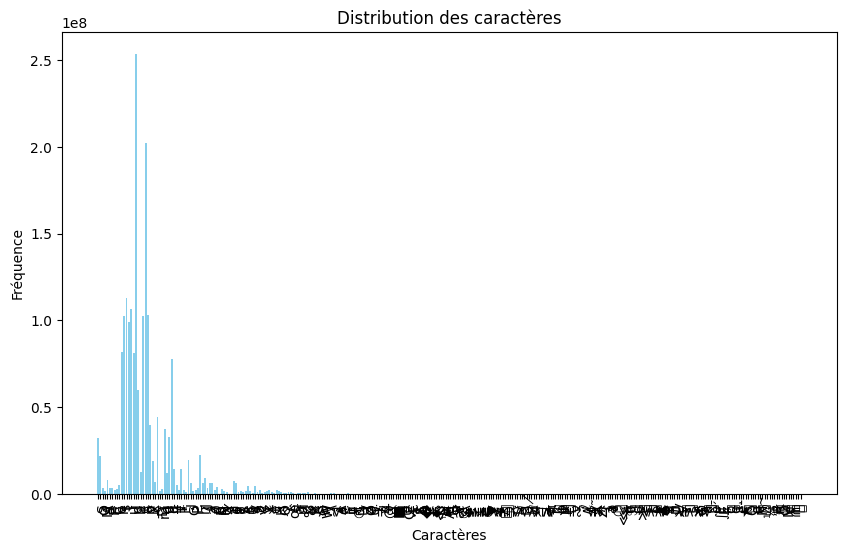

In [7]:
import matplotlib.pyplot as plt
from collections import Counter
#Distribution des caractères (taille des documents):

def distribution_caracteres(strings):
    str_compteur = Counter()
    for string in tqdm(strings):
        str_compteur.update(string)
    return str_compteur

def plot_distrib_caracteres(distrib_caracteres):
    caracteres = list(distrib_caracteres.keys())
    comptes = list(distrib_caracteres.values())

    plt.figure(figsize=(10, 6))
    plt.bar(caracteres, comptes, color='skyblue')
    plt.xlabel('Caractères')
    plt.ylabel('Fréquence')
    plt.title('Distribution des caractères')
    plt.xticks(rotation=90)
    plt.show()

car_distrib = distribution_caracteres(liste_desdocs)
plot_distrib_caracteres(car_distrib)

In [13]:
#Document le plus long/court

longueur_docs = [len(doc) for doc in liste_desdocs]

indice_min = longueur_docs.index(min(longueur_docs))
indice_max = longueur_docs.index(max(longueur_docs))

# Afficher le nom du document et sa longueur
print("Document le plus long :")
print(f"Nom : {liste_desfichiers[indice_max]}")
print(f"Nombre de caractères : {longueur_docs[indice_max]}")
print("Document le plus court :")
print(f"Nom : {liste_desfichiers[indice_min]}")
print(f"Nombre de caractères : {longueur_docs[indice_min]}")

Document le plus long :
Nom : 1887-05-23.txt
Nombre de caractères : 7409830
Document le plus court :
Nom : 1896-01-19.txt
Nombre de caractères : 2200


  0%|          | 0/7166 [00:00<?, ?it/s]

100%|██████████| 7166/7166 [00:46<00:00, 153.68it/s]


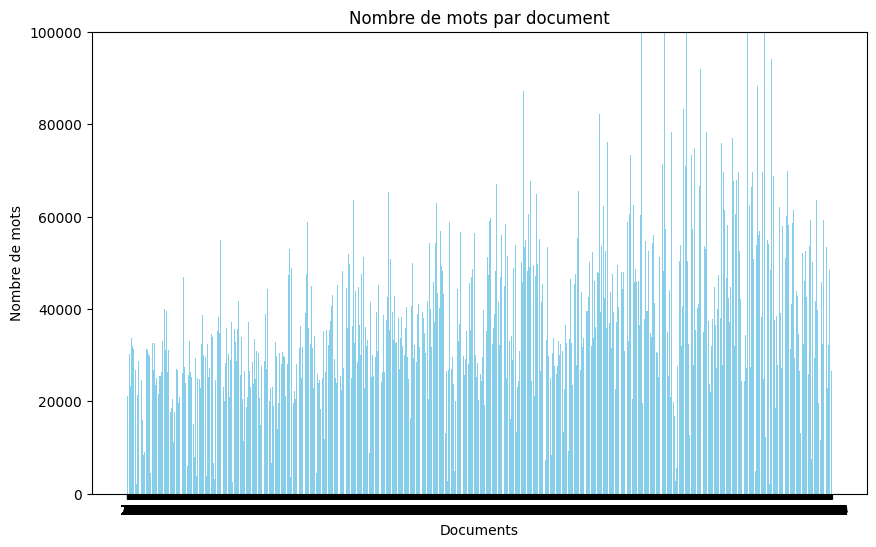

In [9]:
#Distribution des mots par documents : 
import matplotlib.pyplot as plt

def mots_par_doc(strings):
    return [len(string.split()) for string in tqdm(strings)]

def plot_mots_par_doc(compte_mots, y_max=None):
    document_indices = range(1, len(compte_mots) + 1)

    plt.figure(figsize=(10, 6))
    plt.bar(document_indices, compte_mots, color='skyblue')
    plt.xlabel('Documents')
    plt.ylabel('Nombre de mots')
    plt.title('Nombre de mots par document')
    plt.xticks(document_indices)
   
    if y_max is not None:
        plt.ylim(0, y_max)
    plt.show()
compte_mots = mots_par_doc(liste_desdocs)
plot_mots_par_doc(compte_mots, y_max=100000)

In [12]:
def min_max_compteur(doc_compte):
    min_doc = min(doc_compte, key=doc_compte.get)
    max_doc = max(doc_compte, key=doc_compte.get)
    min_value = doc_compte[min_doc]
    max_value = doc_compte[max_doc]
    return (min_doc, min_value), (max_doc, max_value)
def mots_par_doc(strings):
    return [len(string.split()) for string in strings]
def dico_compteur(noms_docus, compteur_mots):
    return dict(zip(noms_docus, compteur_mots))


# Compter le nombre de mots par document
compte_mots = mots_par_doc(liste_desdocs)

# Créer le dictionnaire
doc_compte_mots = dico_compteur(liste_desfichiers, compte_mots)

# Trouver les valeurs min et max
(min_doc, min_value), (max_doc, max_value) = min_max_compteur(doc_compte_mots)

# Afficher le dictionnaire, et les valeurs min et max
print("Dictionnaire des comptes de mots par document:", doc_compte_mots)
print(f"Document avec le nombre minimum de mots: {min_doc} ({min_value} mots)")
print(f"Document avec le nombre maximum de mots: {max_doc} ({max_value} mots)")

Dictionnaire des comptes de mots par document: {'1881-01-11.txt': 5646, '1881-01-20.txt': 5990, '1881-01-21.txt': 9287, '1881-01-22.txt': 21233, '1881-01-24.txt': 26850, '1881-01-25.txt': 24791, '1881-01-27.txt': 35053, '1881-01-31.txt': 28478, '1881-02-01.txt': 28222, '1881-02-03.txt': 13034, '1881-02-05.txt': 30235, '1881-02-07.txt': 24541, '1881-02-08.txt': 23608, '1881-02-10.txt': 28603, '1881-02-12.txt': 18343, '1881-02-14.txt': 28247, '1881-02-15.txt': 31480, '1881-02-17.txt': 21068, '1881-02-19.txt': 30597, '1881-02-21.txt': 12513, '1881-02-22.txt': 29908, '1881-02-24.txt': 29931, '1881-02-26.txt': 30612, '1881-03-03.txt': 27989, '1881-03-05.txt': 30318, '1881-03-07.txt': 26799, '1881-03-08.txt': 27102, '1881-03-10.txt': 31727, '1881-03-12.txt': 33331, '1881-03-14.txt': 1076, '1881-03-15.txt': 33805, '1881-03-17.txt': 35347, '1881-03-19.txt': 32246, '1881-03-21.txt': 27189, '1881-03-22.txt': 23269, '1881-03-24.txt': 27369, '1881-03-26.txt': 19532, '1881-03-28.txt': 25875, '1881-

In [14]:
def top_mots(doc_word_counts, n=20):
    sorted_word_counts = sorted(doc_compte_mots.items(), key=lambda item: item[1], reverse=True)
    return sorted_word_counts[:n]

top_20_mots = top_mots(doc_compte_mots, n=30)

print("Dictionnaire des comptes de mots par document:", doc_compte_mots)
print("\nLes 20 documents avec le plus de mots:")
for doc, count in top_20_mots:
    print(f"{doc}: {count} mots")


Dictionnaire des comptes de mots par document: {'1881-01-11.txt': 5646, '1881-01-20.txt': 5990, '1881-01-21.txt': 9287, '1881-01-22.txt': 21233, '1881-01-24.txt': 26850, '1881-01-25.txt': 24791, '1881-01-27.txt': 35053, '1881-01-31.txt': 28478, '1881-02-01.txt': 28222, '1881-02-03.txt': 13034, '1881-02-05.txt': 30235, '1881-02-07.txt': 24541, '1881-02-08.txt': 23608, '1881-02-10.txt': 28603, '1881-02-12.txt': 18343, '1881-02-14.txt': 28247, '1881-02-15.txt': 31480, '1881-02-17.txt': 21068, '1881-02-19.txt': 30597, '1881-02-21.txt': 12513, '1881-02-22.txt': 29908, '1881-02-24.txt': 29931, '1881-02-26.txt': 30612, '1881-03-03.txt': 27989, '1881-03-05.txt': 30318, '1881-03-07.txt': 26799, '1881-03-08.txt': 27102, '1881-03-10.txt': 31727, '1881-03-12.txt': 33331, '1881-03-14.txt': 1076, '1881-03-15.txt': 33805, '1881-03-17.txt': 35347, '1881-03-19.txt': 32246, '1881-03-21.txt': 27189, '1881-03-22.txt': 23269, '1881-03-24.txt': 27369, '1881-03-26.txt': 19532, '1881-03-28.txt': 25875, '1881-

In [16]:
def mini_mots(doc_compte, n=20):
    mots_tri = sorted(doc_compte.items(), key=lambda item: item[1])
    return mots_tri[:n]

mini_mots_20 = mini_mots(doc_compte_mots, n=40)

print("Dictionnaire des comptes de mots par document:", doc_compte_mots)
print("\nLes 20 documents avec le moins de mots:")
for doc, count in mini_mots_20:
    print(f"{doc}: {count} mots")


Dictionnaire des comptes de mots par document: {'1881-01-11.txt': 5646, '1881-01-20.txt': 5990, '1881-01-21.txt': 9287, '1881-01-22.txt': 21233, '1881-01-24.txt': 26850, '1881-01-25.txt': 24791, '1881-01-27.txt': 35053, '1881-01-31.txt': 28478, '1881-02-01.txt': 28222, '1881-02-03.txt': 13034, '1881-02-05.txt': 30235, '1881-02-07.txt': 24541, '1881-02-08.txt': 23608, '1881-02-10.txt': 28603, '1881-02-12.txt': 18343, '1881-02-14.txt': 28247, '1881-02-15.txt': 31480, '1881-02-17.txt': 21068, '1881-02-19.txt': 30597, '1881-02-21.txt': 12513, '1881-02-22.txt': 29908, '1881-02-24.txt': 29931, '1881-02-26.txt': 30612, '1881-03-03.txt': 27989, '1881-03-05.txt': 30318, '1881-03-07.txt': 26799, '1881-03-08.txt': 27102, '1881-03-10.txt': 31727, '1881-03-12.txt': 33331, '1881-03-14.txt': 1076, '1881-03-15.txt': 33805, '1881-03-17.txt': 35347, '1881-03-19.txt': 32246, '1881-03-21.txt': 27189, '1881-03-22.txt': 23269, '1881-03-24.txt': 27369, '1881-03-26.txt': 19532, '1881-03-28.txt': 25875, '1881-

In [ ]:
def moyenne(compte_mots):
    return sum(compte_mots) / len(compte_mots) if compte_mots else 0
moyenne_mots = moyenne(compte_mots)
print("Dictionnaire des comptes de mots par document:", doc_compte_mots)
print(f"\nNombre moyen de mots par document: {moyenne_mots:.2f} mots")

Dictionnaire des comptes de mots par document: {'1881-01-11.txt': 5646, '1881-01-20.txt': 5990, '1881-01-21.txt': 9287, '1881-01-22.txt': 21233, '1881-01-24.txt': 26850, '1881-01-25.txt': 24791, '1881-01-27.txt': 35053, '1881-01-31.txt': 28478, '1881-02-01.txt': 28222, '1881-02-03.txt': 13034, '1881-02-05.txt': 30235, '1881-02-07.txt': 24541, '1881-02-08.txt': 23608, '1881-02-10.txt': 28603, '1881-02-12.txt': 18343, '1881-02-14.txt': 28247, '1881-02-15.txt': 31480, '1881-02-17.txt': 21068, '1881-02-19.txt': 30597, '1881-02-21.txt': 12513, '1881-02-22.txt': 29908, '1881-02-24.txt': 29931, '1881-02-26.txt': 30612, '1881-03-03.txt': 27989, '1881-03-05.txt': 30318, '1881-03-07.txt': 26799, '1881-03-08.txt': 27102, '1881-03-10.txt': 31727, '1881-03-12.txt': 33331, '1881-03-14.txt': 1076, '1881-03-15.txt': 33805, '1881-03-17.txt': 35347, '1881-03-19.txt': 32246, '1881-03-21.txt': 27189, '1881-03-22.txt': 23269, '1881-03-24.txt': 27369, '1881-03-26.txt': 19532, '1881-03-28.txt': 25875, '1881-